# Capstone 2 Exploratory Data Analysis

In this part we will perform Exploratory Data Analysis of out dataset. During this analysis we will try to answer several questions about our data.
What is the minimum, average and maximum age in the dataset?
Which gender has more positive cases? What is the percentage of positive cases in each gender?
What features are intercorellated and what are the coefficients of correlation?
What feature is the most correlated with the target?
What feature is the least correlated with the target?
What feature explains the most of variance?

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('D:\Tutorials\SDST\My Projects\Capstone2\Data Wrangling\Diabetes_Data_wrangling.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Let's take closer look at our data. First we'll find out if we have the same amount of male and female patients.

In [5]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

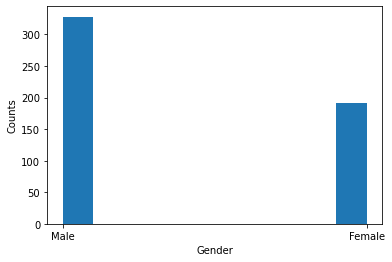

In [6]:
plt.hist(df['Gender'], bins=10)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show();

As we can see, there are 328 males and 192 females. Now let's take a look at the patients' age.

In [7]:
df_age = df['Age']

In [8]:
df_age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

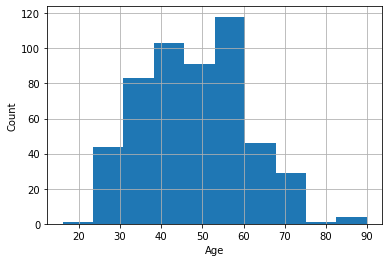

In [9]:
plt.hist(df_age, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show;

We can see that the data is normally distributed. The mean age of our patients is 48 years old with the standard deviation of approximately 12 years. The youngest patiens is 16 years old and the oldest one is 90 years old.

Now let's take a look which gender has more positive cases and what it the percentage of positive cases for each gender.

In [10]:
df_gender = df[['Gender', 'class']]
df_gender['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [11]:
class_pos = df[df['class'] == 'Positive']
prop_pos = (len(class_pos) / len(df))*100
print(prop_pos)

61.53846153846154


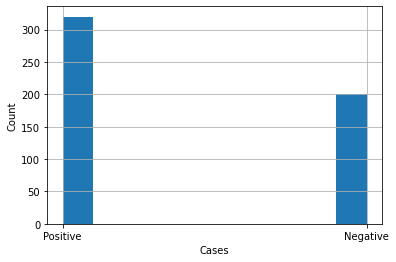

In [12]:
plt.hist(df_gender['class'], bins=10)
plt.xlabel('Cases')
plt.ylabel('Count')
plt.grid()
plt.show;

#### Overall, we have 520 cases, 320 of which are positive and 200 are negative. Percent of positive cases is 61.5%, negative - 38.5%.

In [13]:
df_male = df_gender[df_gender['Gender'] == 'Male']
df_female = df_gender[df_gender['Gender'] == 'Female']

In [14]:
df_male['Gender'].value_counts()

Male    328
Name: Gender, dtype: int64

In [15]:
df_male['class'].value_counts()

Negative    181
Positive    147
Name: class, dtype: int64

In [16]:
df_male_pos = df_male[df_male['class'] == 'Positive']
df_male_neg = df_male[df_male['class'] == 'Negative']
df_male_pos_prop = len(df_male_pos)/len(df_male)
df_male_pos_perc = df_male_pos_prop * 100
print(df_male_pos_perc)

44.81707317073171


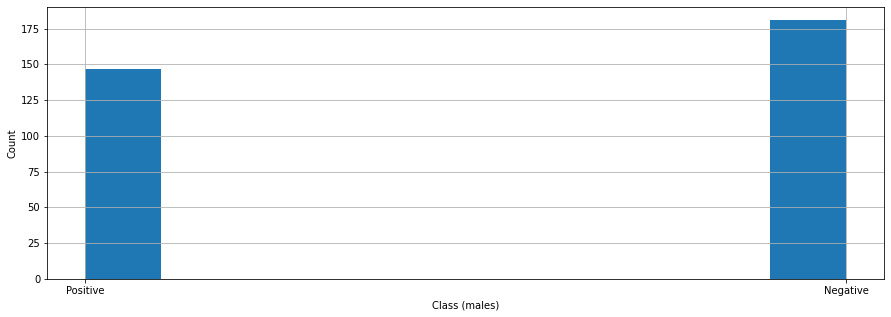

In [17]:
plt.figure(figsize=[15, 5])
plt.hist(df_male['class'], bins=10)
plt.xlabel('Class (males)')
plt.ylabel('Count')
plt.grid()
plt.show();

We can see, that 147 out of 328 males (approximately 44.8%) in the dataset were classified as 'Positive'. Since we only have two classes, we can assume that aproximately 55.2% of males were classified as 'Negative'.

Now let's find out the percentage for females. 

In [18]:
df_female['class'].value_counts()

Positive    173
Negative     19
Name: class, dtype: int64

In [19]:
df_female['Gender'].value_counts()

Female    192
Name: Gender, dtype: int64

In [20]:
df_female_pos = df_female[df_female['class'] == 'Positive']
df_female_pos_prop = len(df_female_pos)/len(df_female)
df_female_pos_perc = df_female_pos_prop * 100
print(df_female_pos_perc)

90.10416666666666


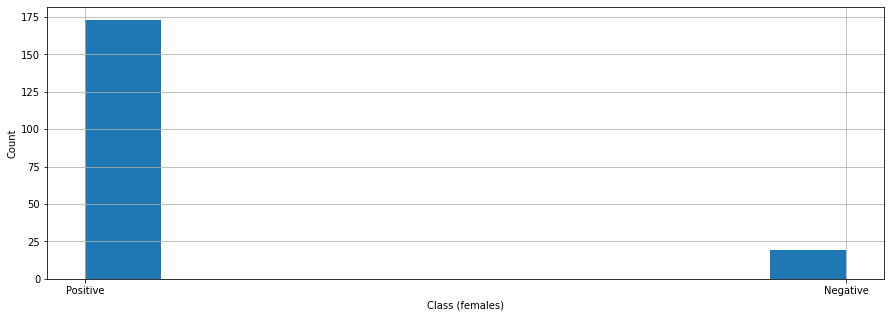

In [21]:
plt.figure(figsize=[15, 5])
plt.hist(df_female['class'], bins=10)
plt.xlabel('Class (females)')
plt.ylabel('Count')
plt.grid()
plt.show();

As we can see, 173 out of 192 females (approximately 90.1%) in the dataset were classified as 'Positive'. Since we only have two classes, we can assume that approximately 9.9% of females were classified as 'Negative'. The data is heavily skewed towards 'Positive' class and is highly unbalanced.

Let's take a look at our original dataset once again.

In [22]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


We only have one numeric column in the dataset - 'Age'. All other columns are categorical values which we need to encode in order to perform future exploratory analysis and modeling. Let's check if those categorical variables are binary.

In [23]:
df_enc = df

In [24]:
#numerical column
num_col = df_enc['Age']

In [25]:
#categorical columns
cat_cols = df_enc.columns.drop('Age')

In [26]:
#see how many unique values for each feature
df_enc[cat_cols].apply(lambda x: x.nunique(), axis=0)

Gender                2
Polyuria              2
Polydipsia            2
sudden weight loss    2
weakness              2
Polyphagia            2
Genital thrush        2
visual blurring       2
Itching               2
Irritability          2
delayed healing       2
partial paresis       2
muscle stiffness      2
Alopecia              2
Obesity               2
class                 2
dtype: int64

It seems like all our categorical columns have two unique values. For all columns except 'Gender' and 'class' those values are strings 'Yes' and 'No', for 'Gender' column - strings 'Male' and 'Female' and for 'class' column - strings 'Positive' and 'Negative'. Since all of the values are binary, we can encode them using pandas .map() function. In order to keep our data from increasing dimensionality we will not use pandas.get_dummies()

In [27]:
df_enc['Gender'] = df_enc['Gender'].map({'Female':1, 'Male':0})

In [28]:
for column in df_enc.columns:
    if column == 'Age':
        continue
    elif column == 'Gender':
        continue
    else:
        df_enc[column] = df_enc[column].map({'No':0, 'Yes':1, 'Negative':0, 'Positive':1})

In [29]:
df_enc.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


The list of encoding labels and values: Male - 0, Female - 1, No - 0, Yes - 1, Negative - 0, Positive - 1.

Now let's see how different features are correlated to each other using seaborn heatmap.

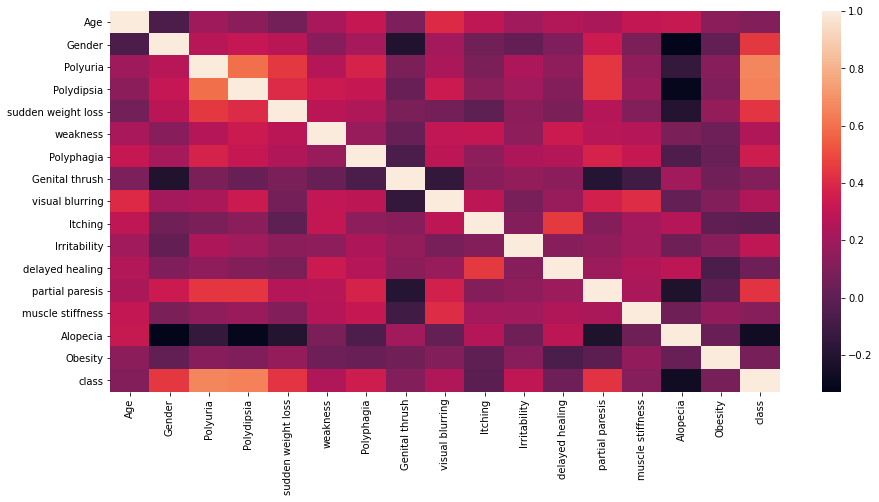

In [30]:
corr = df_enc.corr()
plt.figure(figsize=[15, 7])
sns.heatmap(corr);

Let's take a look at the heatmap. We are interested in how our target feature ('class') is correlated with other features (which are a patient's charachteristics).
From the map we can derive that the highest correlation is with 'Polyuria' (production of abnormally large volumes of dilute urine) and 'Polydipsia' (abnormally great thirst as a symptom of disease). It is also correlated with 'Gender' (we saw that percentage of women with positive class in the dataset is 90.1% against 44.8% of men), 'sudden weight loss', and 'partial paresis'(a condition of muscular weakness caused by nerve damage or disease).

Now let's look at the numbers. Here is a table with pairwise correlation of each feature.

In [31]:
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
Polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


We will only consider those features which have correlation coefficients above 'moderate' (0.40 - 0.59) and 'strong' (0.60-0.79) thresholds.
We are paricularly interested in out target variable, so let's see how it looks.

In [32]:
corr['class'].sort_values(ascending=False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Name: class, dtype: float64

As it is clear from the table we only have two features whose correlation with the target can be considered 'strong'. Those are 'Polyuria' (0.67) and 'Polydipsia (0.65). The features with 'moderate' correlation are 'Gender' (0.45), 'Sudden Weight Loss' (0.44) and 'Partial Paresis' (0.43). Surprisingly enough, 'Age' does not seem to be a significant factor with the coefficient of only 0.11. Our target is also very weakly correlated with 'Obesity', which a lot of people think would be one of the primary causes of diabetes. It is also negatively correlated with 'Alopecia' - a condition that causes hair to fall out in small patches.
Let's create a dataframe for above mentioned important features and see how they are correlated with each other.

In [33]:
# features = pd.DataFrame(corr['class'].sort_values(ascending=False))
# features_list = features.index.to_list()
# for feature in features_list:
#    display(corr[feature].sort_values(ascending=False))

In [34]:
imp_feat = df_enc[['Polyuria', 'Polydipsia', 'Gender', 'sudden weight loss', 'partial paresis', 'class']]
imp_feat.head()

,Polyuria,Polydipsia,Gender,sudden weight loss,partial paresis,class
0,0,1,0,0,0,1
1,0,0,0,0,1,1
2,1,0,0,0,0,1
3,0,0,0,1,0,1
4,1,1,0,1,1,1


Now let's take a look only at those features which correlation coeffitient with a target is above 0.4 and see how they are correlated with each other. If we will find independent variables which are highly correlated it might imply that feature collinearity takes place.

In [35]:
corr_imp = imp_feat.corr()

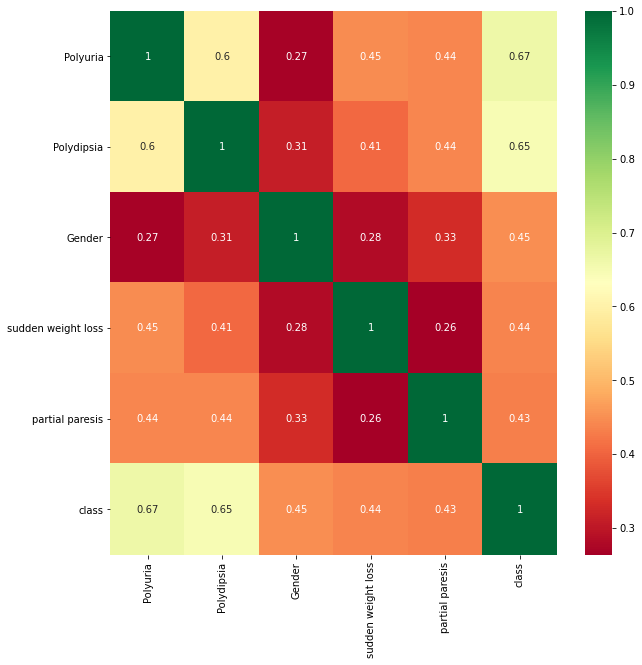

In [36]:
top_corr_features = corr_imp.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As we can see, among these features we don't have those which are higly correlated with each other. We can assume that there is no feature collinearity in our dataset and it will not affect our future model's performance. Let's convert the correlation matrix to the dataframe and save it for later use.

In [37]:
corr_imp_df = pd.DataFrame(corr_imp)

In [38]:
corr_imp_df

,Polyuria,Polydipsia,Gender,sudden weight loss,partial paresis,class
Polyuria,1.000000,0.598609,0.268894,0.447207,0.441664,0.665922
Polydipsia,0.598609,1.000000,0.312262,0.405965,0.442249,0.648734
Gender,0.268894,0.312262,1.000000,0.281840,0.332288,0.449233
sudden weight loss,0.447207,0.405965,0.281840,1.000000,0.264014,0.436568
partial paresis,0.441664,0.442249,0.332288,0.264014,1.000000,0.432288
class,0.665922,0.648734,0.449233,0.436568,0.432288,1.000000


Now let's find top-5 feature-to-target and feature-to-feature correlations. We already know that 'Polyuria' and 'Polydipsia' are correlated the most with the target, but let's check if it's true one more time.

In [39]:
f_to_t = (corr_imp_df.where(np.triu(np.ones(corr_imp_df.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [40]:
print(f_to_t[:5])

Polyuria    class                 0.665922
Polydipsia  class                 0.648734
Polyuria    Polydipsia            0.598609
Gender      class                 0.449233
Polyuria    sudden weight loss    0.447207
dtype: float64


As we expected, those two features are indeed the most correlated with target. Now, let's find out what features are the most correlated with each other. In order to do it we will drop our target feature from the correlation matrix.

In [41]:
corr_imp_df_nt = corr_imp_df.drop('class', axis=1)
f_to_f = (corr_imp_df_nt.where(np.triu(np.ones(corr_imp_df_nt.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [42]:
print(f_to_f[:5])

Polyuria    Polydipsia            0.598609
            sudden weight loss    0.447207
Polydipsia  partial paresis       0.442249
Polyuria    partial paresis       0.441664
Polydipsia  sudden weight loss    0.405965
dtype: float64


Two features that have the highest intercorrelation are 'Polyuria' to 'Polydipsia' (correlation 0.60) and 'Polyuria' to 'partial paresis' (0.45). Now let's convert the series to dataframes and save them as pickle files.

In [43]:
f_to_t_df = pd.DataFrame(f_to_t[:5])
f_to_f_df = pd.DataFrame(f_to_f[:5])

In [44]:
corrpath = '../Correlations'
if not os.path.exists(corrpath):
    os.mkdir(corrpath)
diabetes_ftot_df_path = os.path.join(corrpath, 'Feature-to-Target.pkl')
if not os.path.exists(diabetes_ftot_df_path):
    with open(diabetes_ftot_df_path, 'wb') as ft:
        pickle.dump(f_to_t_df, ft)
diabetes_ftof_df_path = os.path.join(corrpath, 'Feature-to-Feature.pkl')
if not os.path.exists(diabetes_ftof_df_path):
    with open(diabetes_ftof_df_path, 'wb') as ff:
        pickle.dump(f_to_f_df, ff)

And now let's built a pairplot in order to see the visual representation of our features' interrelationships.

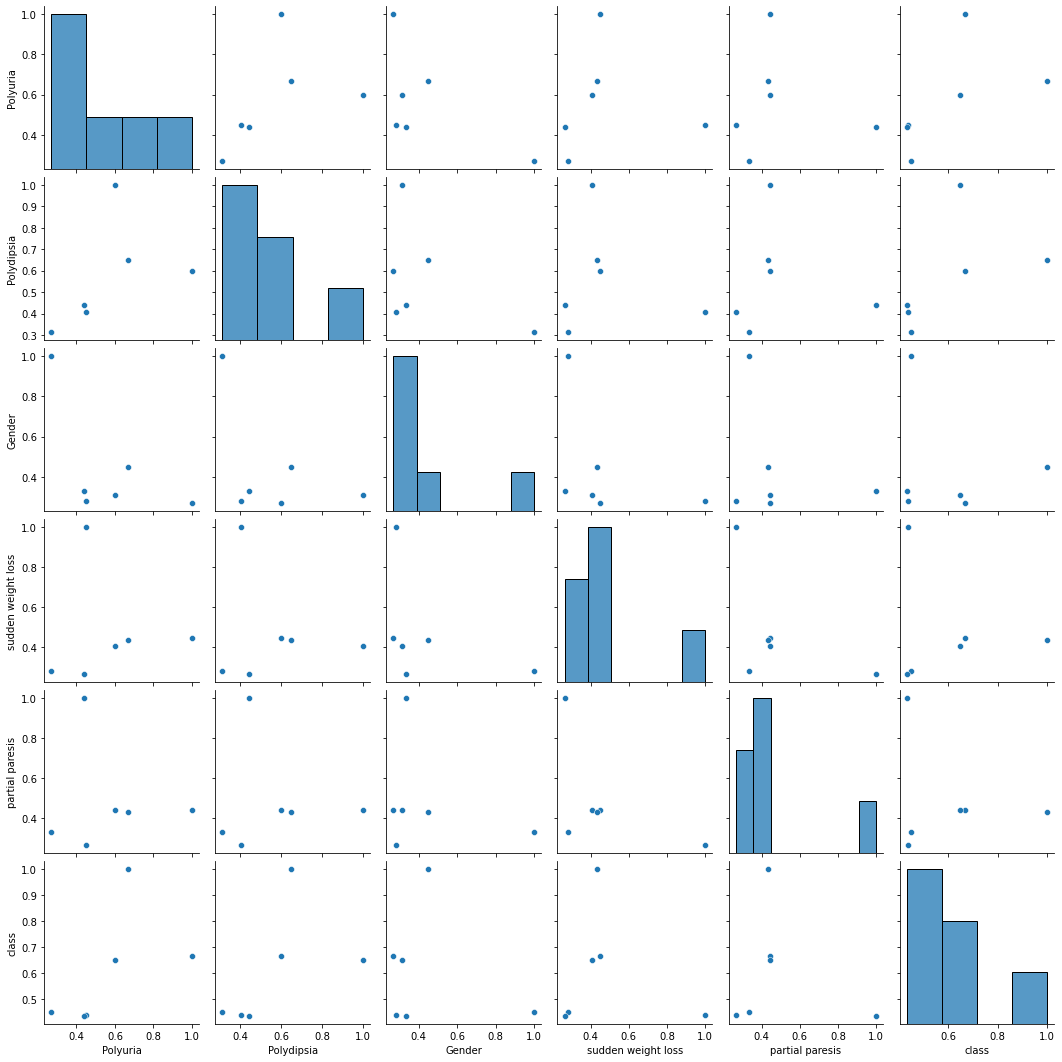

In [45]:
sns.pairplot(corr_imp_df);

In [46]:
#saving the notebook and dataset
datapath = 'D://Tutorials/SDST/My Projects/Capstone2/EDA'
df_enc.to_csv('df_enc', index=False)

## Exploratory Data Analysis summary

Summarizing results of the EDA we can conclude that our dataset is imbalanced - there are 320 positive cases (61.5%) and 200 negative cases (38.5%). The distribution of patients age is approximately normal with mean age of 48 and standard deviation of 12.2. The youngest patient is 16 and the oldest patient is 90 years old. There are 328 male patients and 192 female patients. Percent of male patients classified as 'Positive' is approximately 44.8% (147 out of 328) and percent of female patients classified as 'Positive' is approximately 90.1% (173 out of 192). Features that are 'strongly' and 'moderately' correlated to the target are (from stongest to weakest correlation) 'Polyuria', 'Polydipsia', 'Gender', 'sudden weight loss' and 'partial paresis'.